In [29]:
# thực hiện tiếp các nhiệm vụ sau:
# 
#  lựa chọn đặc trưng 1-gram, 2-gram
# convert sang vector với trọng số ở các mode: binary, count, tfidf 
# chia thành tập Train và Test 
# xây dựng các mô hình học: NB, SVM, Neural Network 
# chọn mô hình tốt nhất và viết hàm dự đoán sentiment của một câu đưa vào

In [7]:
import pandas as pd
import nltk
filename = 'sentimentVN.csv'
df = pd.read_csv(filename)
print(df.head(5))
print(df.shape)

   Unnamed: 0                                       comment label
0           0                         áo bao đẹp ạ positive   POS
1           1                            tuyệt vời positive   POS
2           2                     2day ao không giong trong   NEG
3           3  mùi thơm bôi lên da mềm da nagative positive   POS
4           4                      vải đẹp dày dặn positive   POS
(31460, 3)


In [8]:
from collections import Counter 
counter = Counter()
labels = df['label']
reviews = df.values[:,1] 
counter.update(labels)
print(counter)
print(reviews[:5])

Counter({'POS': 20093, 'NEG': 6669, 'NEU': 4698})
['áo bao đẹp ạ positive' 'tuyệt vời positive' '2day ao không giong trong'
 'mùi thơm bôi lên da mềm da nagative positive' 'vải đẹp dày dặn positive']


In [9]:
df = df.values

lines = df[:,0]
labels = df[:,1]
print(lines[:20])
print(labels[:20])

[0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19]
['áo bao đẹp ạ positive' 'tuyệt vời positive' '2day ao không giong trong'
 'mùi thơm bôi lên da mềm da nagative positive' 'vải đẹp dày dặn positive'
 'hàng rất đẹp rất chi là ưng ý positive positive'
 'chất lượng sản phẩm tốt hạn sử dụng dài positive positive'
 'ăn nói và thái độ phục vụ tốt positive'
 'đóng gói sản phẩm chắc chắn positive'
 'tất sờn hết ca chưa dùng mà vay r' 'cửa hàng phục vụ rất tốt positive'
 'mặc thì cũng được positive' 'chất vải khỏi chê'
 'thời gian giao hàng rất nhanh'
 'chất lượng sản phẩm tuyệt vời positive positive'
 'vải hơi thô cứng thời gian giao hàng nhanh nagative'
 'chất lượng sản phẩm notpos thật sự  nhe cửa hàng positive'
 'rất đáng tiền thời gian giao hàng rất nhanh'
 'quần rất đẹp mặc vừa vặn positive'
 'cảm giác mua hàng bị hớ thật tệ nagative nagative']


<BarContainer object of 3 artists>

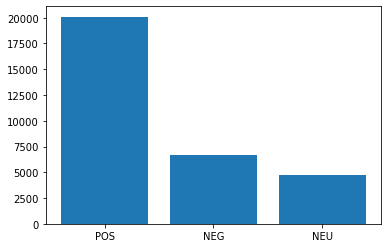

In [10]:
import matplotlib.pyplot as plt
plt.bar(counter.keys(),counter.values())

In [11]:
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
def remove_stop_words(words):
    result = [i for i in words if i not in stopwords.words('english')]
    return result

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nguyn\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\nguyn\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [12]:
sentences = [nltk.word_tokenize(line) for line in lines]
print(sentences[0])
remove_stop_words(sentences)

TypeError: expected string or bytes-like object

In [13]:
from keras.preprocessing.text import Tokenizer 
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)

NameError: name 'sentences' is not defined

In [ ]:
X = tokenizer.texts_to_matrix(sentences,mode='binary')
print(X)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.3, random_state=42)

In [ ]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
GaussianNB = GaussianNB()
GaussianNB.fit(X_train, y_train)

y_pred = GaussianNB.predict(X_test)


print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))

In [ ]:
#MultinomialNB   
from sklearn.naive_bayes import MultinomialNB   
model_NB = MultinomialNB()
model_NB = model_NB.fit(X_train,y_train)
y_pred = model_NB.predict(X_test)

print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))

In [ ]:
# Support Vector Machine's 
from sklearn.linear_model import SGDClassifier

SVC = SGDClassifier()
SVC.fit(X_train, y_train)

y_pred = SVC.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))

In [14]:
input_sent = 'áo xấu vãi' 
tokens = nltk.word_tokenize(input_sent)
print(tokens)
X_input = tokenizer.texts_to_matrix([tokens],mode='binary')
print(X_input)

y_pred = SVC.predict(X_input)
print(y_pred)

['áo', 'xấu', 'vãi']


ValueError: Specify a dimension (`num_words` argument), or fit on some text data first.

In [15]:
input_sent = 'sản phẩm kém' 
tokens = nltk.word_tokenize(input_sent)
print(tokens)
X_input = tokenizer.texts_to_matrix([tokens],mode='binary')
print(X_input)

y_pred = model_NB.predict(X_input)
print(y_pred)

['sản', 'phẩm', 'kém']


ValueError: Specify a dimension (`num_words` argument), or fit on some text data first.

In [16]:
#Neural network hiện đang lỗi
from keras.models import Sequential
from keras.layers import Dense

X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5,random_state=42)
model = Sequential()
model.add(Dense(32, input_dim=3, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='sgd',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train,batch_size=32, epochs=100,validation_data=(X_val, y_val))
model.evaluate(X_test, y_test)[1]

NameError: name 'train_test_split' is not defined